In [1]:
%pylab inline
plt.style.use("bmh")

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import pandas as pd

In [3]:
import sys
import pathlib

In [4]:
%load_ext autoreload
%autoreload 2

In [5]:
CLOUD = False

if CLOUD:
    DATA_DIR = pathlib.Path("/")
else:
    ROOT_DIR = pathlib.Path("/home/traveller/SWProj/Clients/Yandex/code-sessions/time-series/")
    DATA_DIR = ROOT_DIR.joinpath("data")

# Data loading

In [7]:
data = pd.read_csv(DATA_DIR.joinpath("gestures/UWaveGestureLibraryAll_TRAIN.tsv"),
                   sep="\t", header=None)

In [8]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,936,937,938,939,940,941,942,943,944,945
0,6,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.512194,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746
1,5,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739
2,5,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895
3,3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.194748,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551
4,4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.852405,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Columns: 946 entries, 0 to 945
dtypes: float64(945), int64(1)
memory usage: 6.5 MB


In [12]:
COLS = ["label"] + [f"{comp}_{i}" for comp in ["x", "y", "z"] for i in range(315)]

In [13]:
data.columns = COLS

In [14]:
data.head()

,label,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,z_305,z_306,z_307,z_308,z_309,z_310,z_311,z_312,z_313,z_314
0,6,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,-0.312502,...,0.512194,0.503002,0.492524,0.482045,0.463662,0.445278,0.426895,0.408511,0.390129,0.371746
1,5,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,1.629721,...,-0.424252,-0.424252,-0.424252,-0.424414,-0.426015,-0.437960,-0.449905,-0.461849,-0.473794,-0.485739
2,5,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,0.665410,...,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895,-0.856895
3,3,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,0.164887,...,-0.194748,-0.131015,-0.286569,0.051284,0.389136,0.149143,0.245672,0.437129,0.639840,0.842551
4,4,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,1.272493,...,1.852405,1.819330,1.741195,1.624052,1.506909,1.439170,1.500978,1.618121,1.735263,1.852405


In [15]:
data.label.value_counts()

5    127
1    122
7    112
6    111
4    110
2    108
3    106
8    100
Name: label, dtype: int64

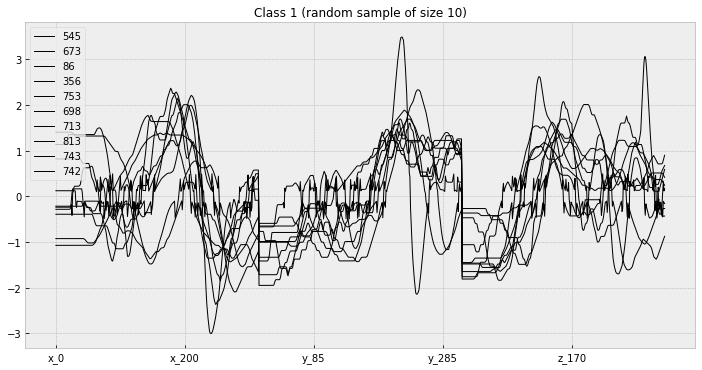

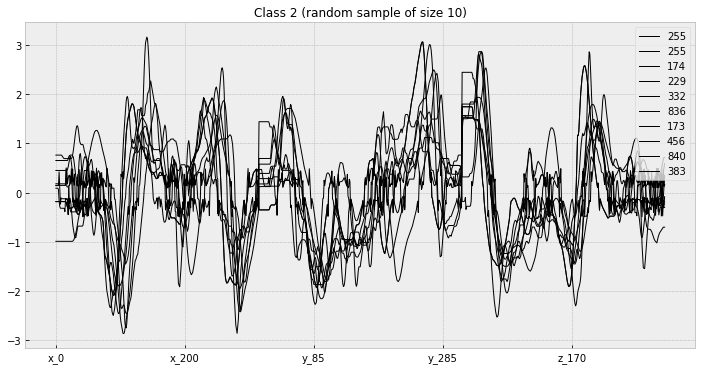

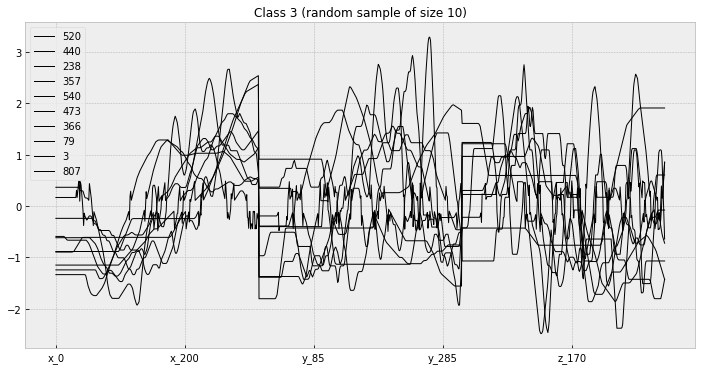

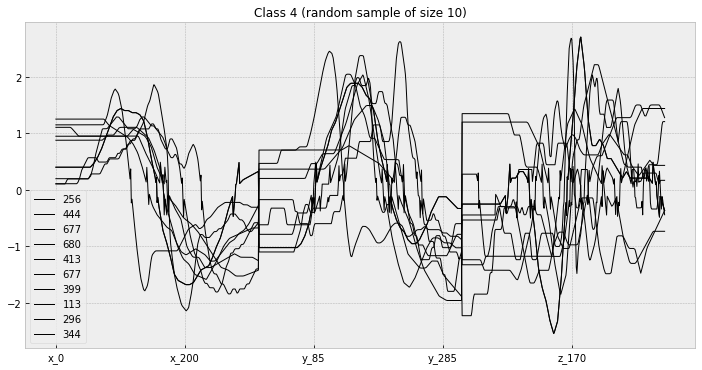

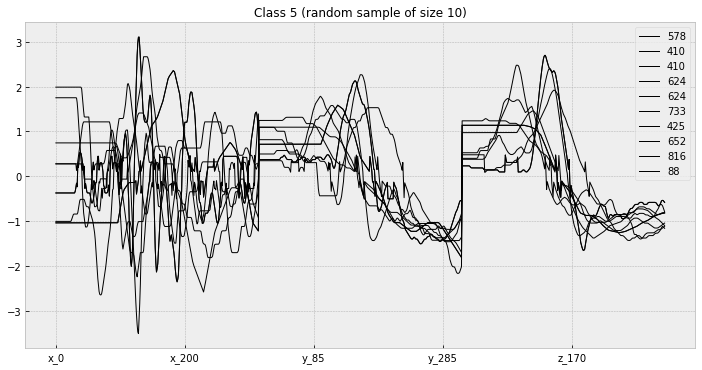

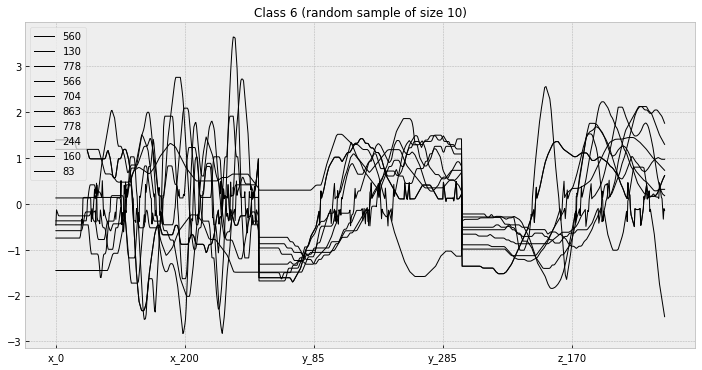

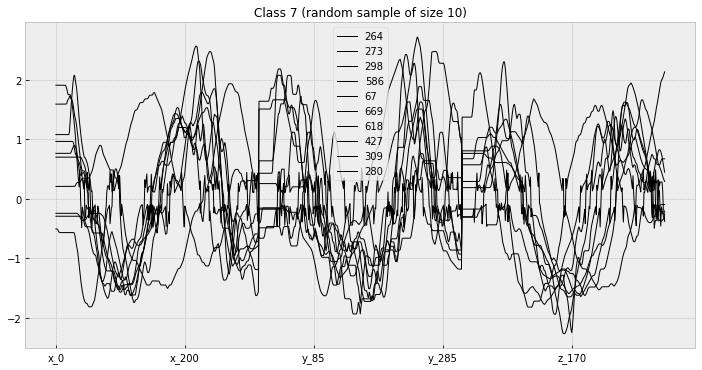

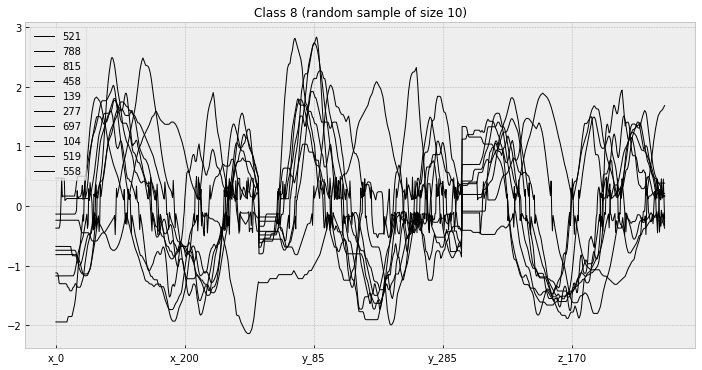

In [21]:
for i in range(1, 9):
    sample = data[data.label==i].sample(10, replace=True)

    plt.figure(figsize=(12,6))
    sample.iloc[:, 1:].transpose().plot(ax=plt.gca(), c="k", linewidth=1)
    plt.title(f"Class {i} (random sample of size 10)", fontsize=12)
    plt.show()

In [23]:
sample.iloc[:, 1:].transpose()

,521,788,815,458,139,277,697,104,519,558
x_0,-0.678148,-1.946784,-0.816028,0.467156,-1.173712,-0.238605,-0.371185,-1.123278,-0.135438,-0.743007
x_1,-0.678148,-1.946784,-0.816028,0.467156,-1.173712,-0.238605,-0.371185,-1.123278,-0.135438,-0.743007
x_2,-0.678148,-1.946784,-0.816028,0.467156,-1.173712,-0.238605,-0.371185,-1.123278,-0.135438,-0.743007
x_3,-0.678148,-1.946784,-0.816028,0.467156,-1.173712,-0.238605,-0.371185,-1.139275,-0.135438,-0.743007
x_4,-0.678148,-1.946784,-0.816028,0.467156,-1.173712,-0.238605,-0.371185,-1.199395,-0.135438,-0.743007
...,...,...,...,...,...,...,...,...,...,...
z_310,0.384984,-0.167716,0.176635,1.610516,-0.128270,0.265504,0.130278,-0.284039,0.196910,0.221782
z_311,0.384984,-0.148629,0.176635,1.624747,-0.160095,0.235164,0.152162,-0.245541,0.183990,0.155813
z_312,0.384984,-0.285325,0.176635,1.645424,-0.191918,0.211234,0.154417,-0.179102,0.171046,0.452804
z_313,0.384984,-0.332716,0.176635,1.666101,-0.223742,0.211234,0.155079,-0.115212,0.170883,0.122061


In [33]:
acc_data = pd.DataFrame(np.sqrt(np.square(data[XCOLS]).values
                                + np.square(data[YCOLS]).values
                                + np.square(data[ZCOLS]).values),
                        columns=[f"a_{i}" for i in range(315)])

In [53]:
XCOLS = [cl for cl in data.columns if "x_" in cl]
YCOLS = [cl for cl in data.columns if "y_" in cl]
ZCOLS = [cl for cl in data.columns if "z_" in cl]
ACOLS = [cl for cl in data.columns if "a_" in cl]

In [35]:
data = data.join(acc_data)

In [39]:
data.apply(["mean", "std"], axis=1)

,mean,std
0,0.412290,1.164846
1,0.424717,1.156601
2,0.424112,1.156823
3,0.384336,1.165214
4,0.409532,1.158991
...,...,...
891,0.371257,1.169451
892,0.406487,1.154921
893,0.400158,1.158160
894,0.421007,1.166154


In [40]:
AGGS = ["mean", "std", "median", "min", "max", "skew"]

In [45]:
features = []

for comp, cols in zip(["x", "y", "z", "a"], [XCOLS, YCOLS, ZCOLS, ACOLS]):
    features.append((data[cols]
                     .apply(AGGS, axis=1)
                     .rename(lambda cl: f"{comp}_{cl}", axis=1)))

In [51]:
features = pd.concat(features, axis=1)

In [52]:
features.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 896 entries, 0 to 895
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   x_mean    896 non-null    float64
 1   x_std     896 non-null    float64
 2   x_median  896 non-null    float64
 3   x_min     896 non-null    float64
 4   x_max     896 non-null    float64
 5   x_skew    896 non-null    float64
 6   y_mean    896 non-null    float64
 7   y_std     896 non-null    float64
 8   y_median  896 non-null    float64
 9   y_min     896 non-null    float64
 10  y_max     896 non-null    float64
 11  y_skew    896 non-null    float64
 12  z_mean    896 non-null    float64
 13  z_std     896 non-null    float64
 14  z_median  896 non-null    float64
 15  z_min     896 non-null    float64
 16  z_max     896 non-null    float64
 17  z_skew    896 non-null    float64
 18  a_mean    896 non-null    float64
 19  a_std     896 non-null    float64
 20  a_median  896 non-null    float6

In [54]:
features.describe()

,x_mean,x_std,x_median,x_min,x_max,x_skew,y_mean,y_std,y_median,y_min,...,z_median,z_min,z_max,z_skew,a_mean,a_std,a_median,a_min,a_max,a_skew
count,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,...,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000,896.000000
mean,0.000205,1.001093,-0.004687,-1.827719,1.861302,0.033726,-0.000250,1.000813,-0.006802,-1.653017,...,-0.012727,-1.688618,1.901902,0.098162,1.622905,0.583466,1.582011,0.573272,3.044320,0.347637
std,0.009546,0.002093,0.282324,0.491523,0.504342,0.510727,0.008977,0.002036,0.309300,0.421597,...,0.291065,0.416197,0.527855,0.545537,0.055563,0.143732,0.161764,0.255683,0.586360,0.652606
min,-0.059989,0.990147,-0.693738,-4.433968,0.498750,-2.086030,-0.070002,0.990998,-0.757887,-4.096937,...,-0.756247,-3.542302,0.461240,-1.966475,1.362020,0.226196,0.772821,0.158346,2.045143,-1.751008
25%,-0.002875,1.000178,-0.235711,-2.094983,1.528834,-0.304475,-0.003061,0.999931,-0.261869,-1.894690,...,-0.229796,-1.909754,1.539164,-0.259616,1.594041,0.477300,1.512539,0.351468,2.666510,-0.086239
50%,0.000044,1.000952,-0.090703,-1.743756,1.795364,0.025873,-0.000004,1.000818,-0.086143,-1.584641,...,-0.100647,-1.638847,1.813221,0.072274,1.632419,0.577142,1.609031,0.536253,2.926731,0.270983
75%,0.002748,1.001816,0.210332,-1.478950,2.094417,0.345089,0.002795,1.001549,0.247273,-1.369817,...,0.222790,-1.433486,2.193290,0.438776,1.664252,0.676246,1.690326,0.763344,3.291100,0.706993
max,0.076977,1.014848,0.807331,-0.789804,4.417596,2.546233,0.040012,1.015112,0.736611,-0.721249,...,0.724115,-0.555410,4.771797,2.464054,1.716340,1.070216,1.947768,1.352161,9.171661,4.289380
